# Early stopping 

- Stopping the training run at right epochs.

- This can reduce overfitting if the model has already captured feature of function and yet to overfit.


## Example 

- In the following graph. The loss become straight line around 50 epochs. 

- After that it will get overfit.

- `Code Down Below`

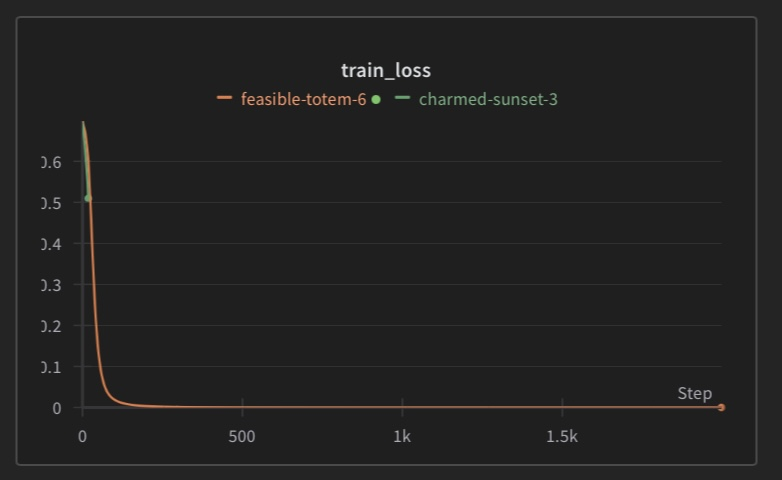

In [1]:
import wandb

In [3]:
wandb.login()

wandb: Currently logged in as: saurabhaloney85 (iiconicai). Use `wandb login --relogin` to force relogin


True

In [4]:
wandb.init(project='learn', entity='iiconicai', reinit=True, mode="online")


In [5]:


import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
from sklearn.datasets import make_circles
import wandb

# Initialize WandB with reinit and mode
wandb.init(project='learn', entity='iiconicai', reinit=True, mode="online")  # Replace 'your_wandb_username' with your WandB username

# data using make_circles
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Adding an extra dimension for the labels

# log in wandb 
wandb.login()

# Create a dataset from the tensors
dataset = TensorDataset(X, y)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# DataLoader objects for training and validation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

class CircleModel(nn.Module):
    def __init__(self):
        super(CircleModel, self).__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=7)
        self.layer_3 = nn.Linear(in_features=7, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.layer_3(x)
        return x

def accuracy(preds, labels):
    preds = torch.sigmoid(preds)
    preds = (preds > 0.5).float()
    return (preds == labels).float().mean()

def train(model, train_loader, criterion, optimizer, epoch):
    model.train()
    running_loss = 0.0
    running_acc = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        acc = accuracy(output, target)
        running_loss += loss.item()
        running_acc += acc.item()
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = running_acc / len(train_loader)
    wandb.log({"epoch": epoch, "train_loss": epoch_loss, "train_acc": epoch_acc})
    # print(f'Train Epoch: {epoch} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

def validate(model, val_loader, criterion, epoch):
    model.eval()
    running_loss = 0.0
    running_acc = 0.0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            loss = criterion(output, target)
            acc = accuracy(output, target)
            running_loss += loss.item()
            running_acc += acc.item()
    epoch_loss = running_loss / len(val_loader)
    epoch_acc = running_acc / len(val_loader)
    wandb.log({"epoch": epoch, "val_loss": epoch_loss, "val_acc": epoch_acc})
    # print(f'Validation Epoch: {epoch} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    
num_epochs = 1000
lr=0.001
run = wandb.init(
    # Set the project where this run will be logged
    project="learn",
    # Track hyperparameters and run metadata
    config={
        "learning_rate": lr,
        "epochs": num_epochs,
    },
)

model = CircleModel()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


for epoch in range(1, num_epochs + 1):
    train(model, train_loader, criterion, optimizer, epoch)
    validate(model, val_loader, criterion, epoch)


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Train Epoch: 1 Loss: 0.6982 Acc: 0.4963
Validation Epoch: 1 Loss: 0.6917 Acc: 0.5134
Train Epoch: 2 Loss: 0.6918 Acc: 0.4963
Validation Epoch: 2 Loss: 0.6853 Acc: 0.5134
Train Epoch: 3 Loss: 0.6857 Acc: 0.4963
Validation Epoch: 3 Loss: 0.6790 Acc: 0.5134
Train Epoch: 4 Loss: 0.6794 Acc: 0.4963
Validation Epoch: 4 Loss: 0.6720 Acc: 0.5134
Train Epoch: 5 Loss: 0.6719 Acc: 0.5262
Validation Epoch: 5 Loss: 0.6632 Acc: 0.6652
Train Epoch: 6 Loss: 0.6626 Acc: 0.8350
Validation Epoch: 6 Loss: 0.6523 Acc: 0.9152
Train Epoch: 7 Loss: 0.6514 Acc: 0.9300
Validation Epoch: 7 Loss: 0.6394 Acc: 0.9643
Train Epoch: 8 Loss: 0.6378 Acc: 0.9237
Validation Epoch: 8 Loss: 0.6238 Acc: 0.9286
Train Epoch: 9 Loss: 0.6217 Acc: 0.9187
Validation Epoch: 9 Loss: 0.6060 Acc: 0.9286
Train Epoch: 10 Loss: 0.6025 Acc: 0.9187
Validation Epoch: 10 Loss: 0.5843 Acc: 0.9286
Train Epoch: 11 Loss: 0.5775 Acc: 0.9375
Validation Epoch: 11 Loss: 0.5554 Acc: 0.9777
Train Epoch: 12 Loss: 0.5466 Acc: 0.9650
Validation Epoch: 12

In [6]:
wandb.finish()

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁███████████████████████████████████████
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁███████████████████████████████████████
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,1000
train_acc,1.0
train_loss,0.0
val_acc,1.0
val_loss,0.0
